In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1
* Построить график синуса от 0 до 4*pi
* Сделать подписи вида 0, pi/2, pi и т.д.
* Построить графики косинуса и синуса в одной системе координат

In [2]:
pi_char = '\u03c0'
den = 2
labels = []
for num in range(8):
    n = int(num/np.gcd(num, den))
    d = int(den/np.gcd(num, den))
    
    if n == 0:
        s = '0'
    elif d == 1:
        s = str(n) + '*' + pi_char
    else:
        s = s = str(n) + '/' + str(d) + '*' + pi_char
    labels.append(s)

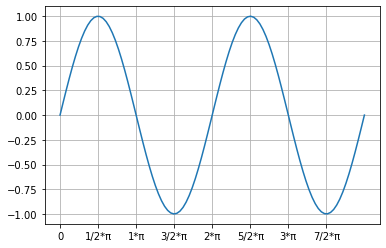

In [3]:
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)
plt.plot(x,y)
plt.xticks(np.arange(0, 4*np.pi, np.pi/2), labels)
plt.grid()
plt.show()

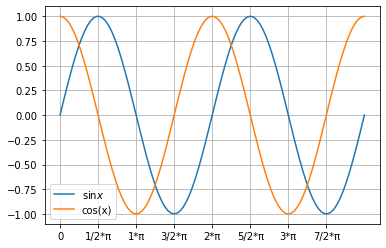

In [4]:
x = np.linspace(0, 4 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(np.arange(0, 4*np.pi, np.pi/2), labels)
plt.grid()
plt.legend([r'$\sinx$', 'cos(x)'])
plt.show()

### Задача 2
* По данным из файла countries.csv построить график роста населения в Зимбабве
* Построить график роста населения в процентах, за 100% взять численность населения в 1952 году

In [5]:
import csv

In [6]:
f = open('data/countries.csv')
data = csv.reader(f)

populations = np.zeros(1704, dtype=np.int32)

for i, row in enumerate(data):
    if row[-1].isdigit():
        populations[i-1] = int(row[-1])

populations = populations.reshape((142,12))

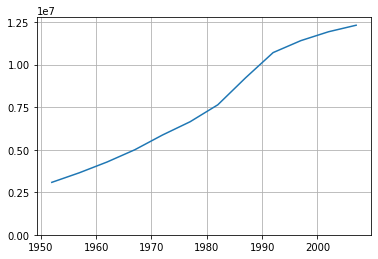

In [7]:
x = np.linspace(1952, 2007, 12, dtype=np.uint16)
y = populations[-1,:]
pop_ticks = np.arange(0, 13000000, 2500000)
plt.plot(x, y)
plt.yticks(pop_ticks)
plt.grid()
plt.show()

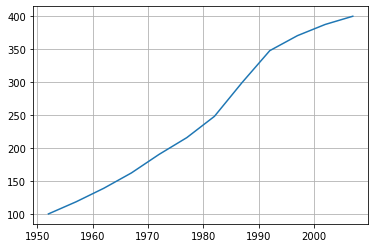

In [8]:
x = np.linspace(1952, 2007, 12, dtype=np.uint16)
y = populations[-1,:] / populations[-1,0] * 100
plt.plot(x, y)
plt.grid()
plt.show()

### Задача 3
Есть упорядоченный словарь с количеством дней в месяцах и  растущая функция на протяжении года. Построить график и расставить отсечки на оси абсцисс в начале каждого месяца.

In [9]:
import collections

In [10]:
days_in = collections.OrderedDict(jan=31,
                                  feb=29,
                                  mar=31,
                                  apr=30,
                                  may=31,
                                  jun=30,
                                  jul=31,
                                  aug=31,
                                  sep=30,
                                  oct=31,
                                  nov=30,
                                  dec=31)
months = np.array([0] + list(days_in.values())[:-1], dtype=np.uint16)
days_ticks = months.cumsum()

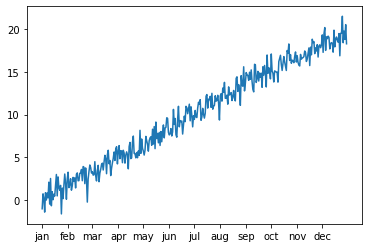

In [11]:
y = np.random.randn(365) + np.linspace(0,20,365)
plt.plot(y)
plt.xticks(days_ticks, list(days_in.keys()))
plt.show()

### Задача 4
* Построить диаграмму для населений городов
* Построить такую же диаграмму, в которой данные отсортированы

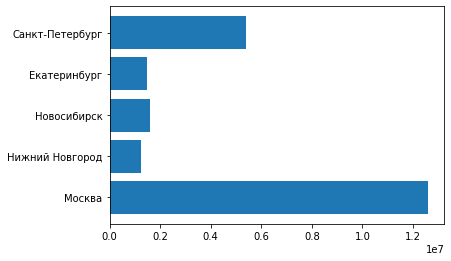

In [12]:
pops = np.array([12615882,  1253511, 1618039, 1483119, 5383890], dtype=np.uint64)
cities = np.array(['Москва','Нижний Новгород' , 'Новосибирск', 'Екатеринбург', 'Санкт-Петербург'], dtype=(np.str_,16))
plt.barh(cities, pops)
plt.show()

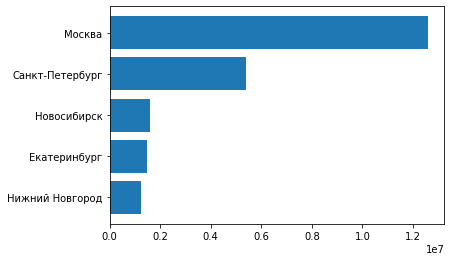

In [13]:
pops.argsort() # индексы элементов, если бы они были отсортированы
order = pops.argsort()
plt.barh(cities[order], pops[order])
plt.show()

### Задача 5
По данным из файла countries.csv построить диаграммы населений стран в 2007 году.
* 10 любых стран
* топ-10 стран по населению
* сделать комбинированную диаграмму, которая показывает соотношение мужчин и женщин

In [14]:
f = open('data/countries.csv')
data = csv.reader(f)

labels = np.empty(1705, dtype=(np.str_, 32))

for i, row in enumerate(data):    
    labels[i] = row[0]

labels = labels[1::12]

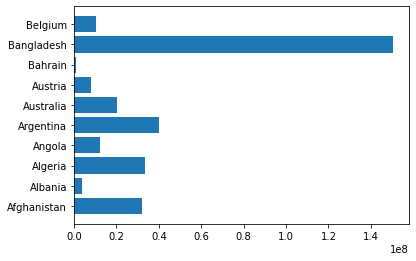

In [15]:
plt.barh(labels[:10], populations[:10,-1]) # данные по населению взяты из задачи 2
plt.show()

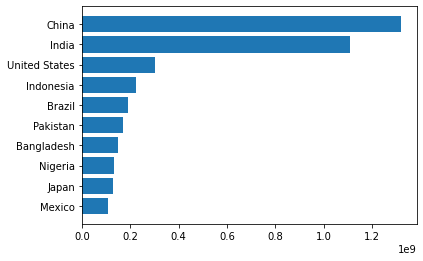

In [16]:
order = populations[:,-1].argsort()
plt.barh(labels[order][-10:], populations[:,-1][order][-10:])
plt.show()

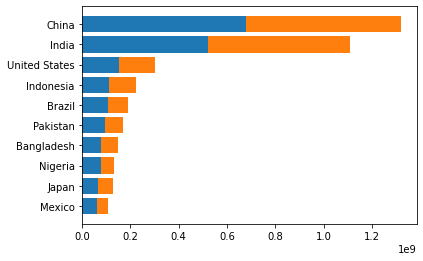

In [17]:
# в данной задаче примем, что процент мужчин в каждой стране -- случайное число с плавающей точкой
men_percentage = np.random.uniform(.4, .6, 142)
men_populations = populations[:,-1] * men_percentage
women_populations = populations[:,-1] * (1 - men_percentage)
plt.barh(labels[order][-10:], men_populations[order][-10:])
plt.barh(labels[order][-10:], women_populations[order][-10:], left = men_populations[order][-10:])
plt.show()

### Задача 6
По данным из файла programming_languages.csv
* построить диаграмму популярности языков программирования
* построить круговую диаграмму популярности языков программирования, причём всё, что не входит в топ-5 считается вместе
* на круговой диаграмме вынести долю PHP

In [18]:
f = open('data/programming_languages.csv')
lines = f.readlines()

languages = np.empty(28, dtype=(np.str_, 16))
shares = np.empty(28, dtype=np.float32)

for i, line in enumerate(lines[1:]):
    cols = line.split(';')
    language = cols[2]
    share = float(cols[3].replace(' ','').replace('%',''))
    languages[i] = language
    shares[i] = share

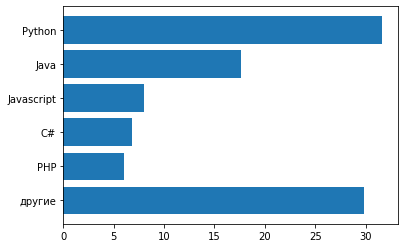

In [19]:
top_n = 5

shares_top = np.empty(top_n + 1, dtype=np.float32)
shares_top[:top_n] = shares[:top_n]
shares_top[top_n] = shares[top_n:].sum()
languages_top = list(languages[:top_n])
languages_top.append('другие')
plt.barh(languages_top[::-1], shares_top[::-1])
plt.show()

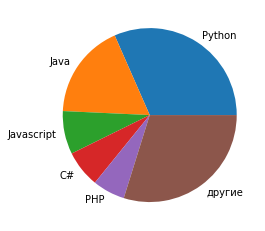

In [20]:
plt.pie(shares_top, labels=languages_top)
plt.show()

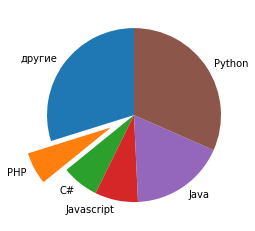

In [21]:
explodes = (np.array(languages_top[::-1]) == 'PHP').astype(np.float) * 0.3
plt.pie(shares_top[::-1], labels=languages_top[::-1], startangle=90, explode=explodes)
plt.show()

### Задача 7
По данным из файла athlete_events.csv
* построить кольцевую диаграмму соотошения мужчин и женщин
* построить столбцовую диаграмму распределения спортсменов по командам

In [22]:
f = open('data/athlete_events.csv')

athletes_n = len(f.readlines()) # читаем файл чтобы посчитать строки

# создаём массивы
genders = np.empty(athletes_n, dtype=(np.str_,1))
teams = np.empty(athletes_n, dtype=(np.str_,32))

f.seek(0) # возвращаем курсор в начало, чтобы прочитать файл, но уже парсером csv

reader = csv.DictReader(f, quotechar='"')

for i, line in enumerate(reader):
    genders[i] = line['Sex']
    teams[i] = line['Team']

gender_labels, gender_counts = np.unique(genders, return_counts=True)

team_labels, team_counts = np.unique(teams, return_counts=True)

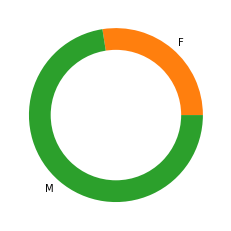

In [23]:
plt.pie(gender_counts, labels=gender_labels)
c = plt.Circle(radius=0.75, xy=(0,0), facecolor='white')
plt.gca().add_artist(c)
plt.show()

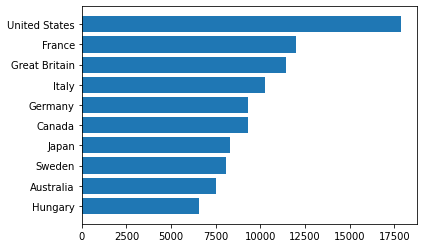

In [24]:
top_n = 10
teams_top_idx = team_counts.argsort()[-1 * top_n:]
team_counts_top = team_counts[teams_top_idx]
team_labels_top = team_labels[teams_top_idx]
plt.barh(team_labels_top, team_counts_top)
plt.show()